Part A
Q1: Final cluster assignments: [2 0 1 2 1 1 0 2]
Q2: Final centers: [[1 3]
 [7 4]
 [3 9]]
Q3:


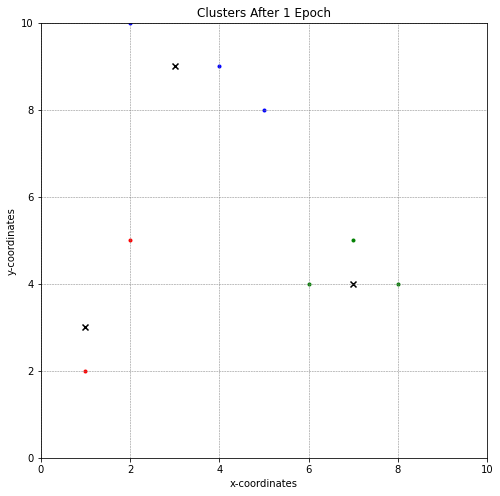

Q4: The clusters have already reached convergence and so no more epochs are necessary
Q5:


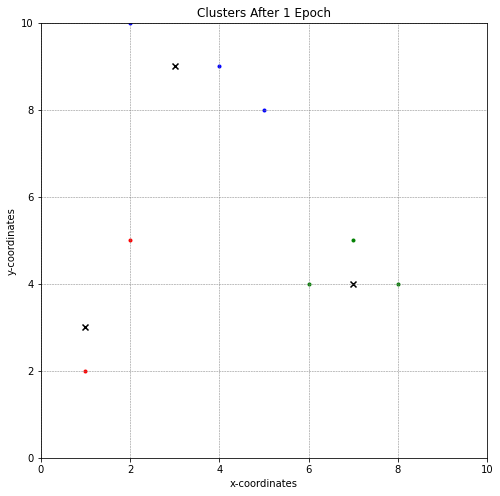

In [74]:
#ELE888 - Intelligent Systems, lab 3, Ahmad Fahmy 500913092

#PART A
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

samples = np.array([(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)])
centers = np.array([(2, 5), (8, 4), (4, 9)])

def euclidean(samples, centers):
  distances = np.zeros((samples.shape[0], centers.shape[0]))
  for i, x in enumerate(samples):
      for j, c in enumerate(centers):
          distances[i, j] = np.sqrt(np.sum((x - c)**2))
  return distances

def assign_clusters(samples, centers):
    distances = euclidean(samples, centers)
    return np.argmin(distances, axis=1)


def update_centers(samples, clusters):
    new_centers = np.zeros_like(centers)
    for i, c in enumerate(centers):
        new_centers[i] = np.mean(samples[clusters == i], axis=0)
    return new_centers

def plotK():
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 10)
  ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

  colors = ['red', 'green', 'blue']
  for i in range(centers.shape[0]):
      ax.scatter(samples[clusters == i, 0], samples[clusters == i, 1], color=colors[i], marker='.')
  ax.scatter(new_centers[:, 0], new_centers[:, 1], color='black', marker='x')

clusters = assign_clusters(samples, centers)
new_centers = update_centers(samples, clusters)

print("Part A")
print("Q1: Final cluster assignments:", clusters)
print("Q2: Final centers:", new_centers)

print("Q3:")
plotK()
plt.title("Clusters After 1 Epoch")
plt.xlabel("x-coordinates")
plt.ylabel("y-coordinates")
plt.show()

print("Q4: The clusters have already reached convergence and so no more epochs are necessary")
print("Q5:")
clusters = assign_clusters(samples, centers)
new_centers = update_centers(samples, clusters)
plotK()
plt.title("Clusters After 1 Epoch")
plt.xlabel("x-coordinates")
plt.ylabel("y-coordinates")
plt.show()

Assumptions: I assume the data is accurate and has no missing values and the dataset is an accurate sample of the total population
Q6: Accuracy: 67.28%
Q7:


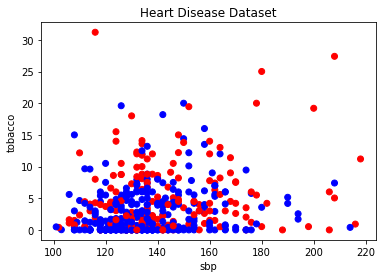

Q8:


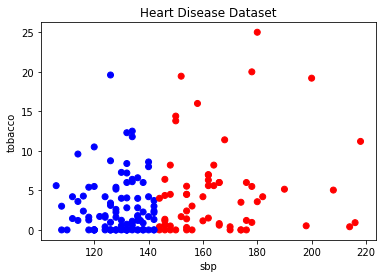

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

X = data[['sbp', 'tobacco']].values
y = data['chd'].values

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]

class KMeans:
    def __init__(KM, m, max_iterations=100):
        KM.m = m
        KM.max_iterations = max_iterations

    def fit(KM, X):
        KM.centroids = X[np.random.choice(X.shape[0], size=KM.m, replace=False)]
        for i in range(KM.max_iterations):
            distances = np.linalg.norm(X[:, np.newaxis] - KM.centroids, axis=2)
            cluster_assignments = np.argmin(distances, axis=1)
            new_centroids = np.array([X[cluster_assignments == j].mean(axis=0) for j in range(KM.m)])
            if np.allclose(new_centroids, KM.centroids):
                break
            KM.centroids = new_centroids

    def predict(KM, X):
        distances = np.linalg.norm(X[:, np.newaxis] - KM.centroids, axis=2)
        return np.argmin(distances, axis=1)


kmeans = KMeans(m=2, max_iterations=100)

kmeans.fit(X_train)

yPred = kmeans.predict(X_test)

accuracyKM_2 = sum(y_test == yPred) / len(y_test)*100


print("Assumptions: I assume the data is accurate and has no missing values and the dataset is an accurate sample of the total population")

print(f"Q6: Accuracy: {accuracyKM_2:.2f}%")

print("Q7:")
color_map = {0: 'blue', 1: 'red'}
colors = [color_map[label] for label in y]

plt.scatter(X[:, 0], X[:, 1], color=colors)

plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Heart Disease Dataset')

plt.show()

print("Q8:")
cluster_map = {0: 'blue', 1: 'red'}
clusters = [cluster_map[cluster] for cluster in yPred]
plt.scatter(X_test[:, 0], X_test[:, 1], color=clusters)
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Heart Disease Dataset')
plt.show()


Q9: Yes the results were the same as K-means

Q10:


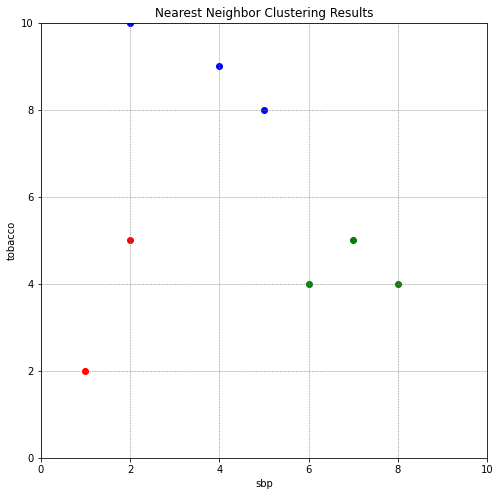


Q11: K-means requires the specification of the number of clusters in advance, while NN does not. This can be an advantage for NN if the optimal number of clusters is unknown or if the data does not have a clear clustering structure.
K-means is generally faster than NN, especially on large datasets. This is because K-means requires only a few iterations to converge to a solution, while NN requires the calculation of pairwise distances between all points in the dataset, which can be computationally expensive for large datasets.
The performance of K-means depends on the initialization of the cluster centers, while NN is not affected by initialization. This means that K-means can converge to suboptimal solutions if the initialization is poor.
Since K-Means requires the specification of the number of clusters in advance, it can be challenging for large datasets with a complex clustering structure. Also, the choice of the number of clusters can significantly affect the quality of the cluste

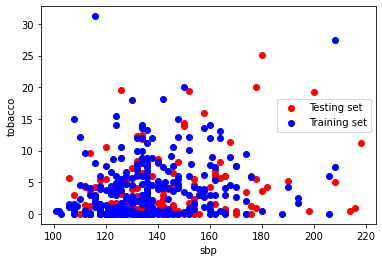

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def euclidean(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def nearest_neighbor_clustering(X, representatives, threshold):
    labels = np.zeros(X.shape[0])

    for i in range(X.shape[0]):
        distances = [euclidean(X[i], r) for r in representatives]
        nearest_index = np.argmin(distances)
        nearest_distance = distances[nearest_index]

        if nearest_distance <= threshold:
            labels[i] = nearest_index
        else:
            labels[i] = len(representatives)
            representatives.append(X[i])

    return labels

def plot_clustering_results(X, labels):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for label in np.unique(labels):
        plt.scatter(X[labels == label, 0], X[labels == label, 1], color=colors[int(label)])
        
    plt.xlabel('sbp')
    plt.ylabel('tobacco')
    plt.title('Nearest Neighbor Clustering Results')

    plt.show()

def nearest_neighbor(X_train, y_train, X_test, threshold):
    predictions = []
    for i in range(len(X_test)):
        min_distance = float('inf')
        min_index = None
        for j in range(len(X_train)):
            dist = euclidean(X_test[i], X_train[j])
            if dist < min_distance:
                min_distance = dist
                min_index = j
        if min_distance <= threshold:
            predictions.append(y_train[min_index])
        else:
            predictions.append(0)
    return np.array(predictions)

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
representatives = [X[1], X[2], X[7]]

labels = nearest_neighbor_clustering(X, representatives, 4)

print("Q9: Yes the results were the same as K-means")

print("\nQ10:")
plot_clustering_results(X, labels)

print("\nQ11: K-means requires the specification of the number of clusters in advance, while NN does not. This can be an advantage for NN if the optimal number of clusters is unknown or if the data does not have a clear clustering structure.")
print("K-means is generally faster than NN, especially on large datasets. This is because K-means requires only a few iterations to converge to a solution, while NN requires the calculation of pairwise distances between all points in the dataset, which can be computationally expensive for large datasets.")
print("The performance of K-means depends on the initialization of the cluster centers, while NN is not affected by initialization. This means that K-means can converge to suboptimal solutions if the initialization is poor.")

print("Since K-Means requires the specification of the number of clusters in advance, it can be challenging for large datasets with a complex clustering structure. Also, the choice of the number of clusters can significantly affect the quality of the clustering results, and it may require trial and error or domain expertise to find the optimal number.")
print("Both algorithms may produce suboptimal clustering results on large datasets with a complex or noisy structure, and they may require additional preprocessing or post-processing steps to improve the results. And the interpretation and visualization of the clustering results can be challenging for large datasets.")

X = data[['sbp', 'tobacco']].values
y = data['chd'].values

X_train = X[:300]
y_train = y[:300]
X_test = X[300:]
y_test = y[300:]

y_pred = nearest_neighbor(X_train, y_train, X_test, 35)

accuracyKNN_2 = np.sum(y_test == y_pred) / len(y_test)

print("\nAssumptions: I assume the data is an accurate sample of the total popuilation, and that sbp and tobacco are good predictors for heart disease and are complete and have no missing values")

print("\nQ12:")
print("Accuracy: {:.2f}%".format(accuracyKNN_2 * 100))

plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label='Testing set')
plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label='Training set')


plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()
plt.show()


Q13:


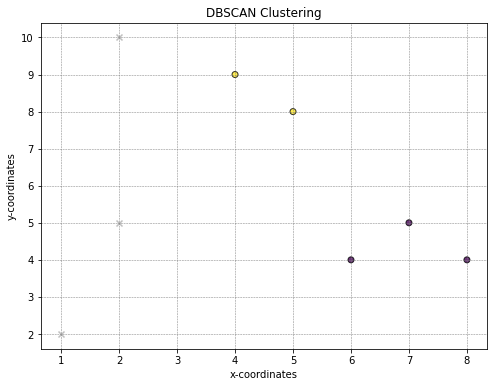

Q14:


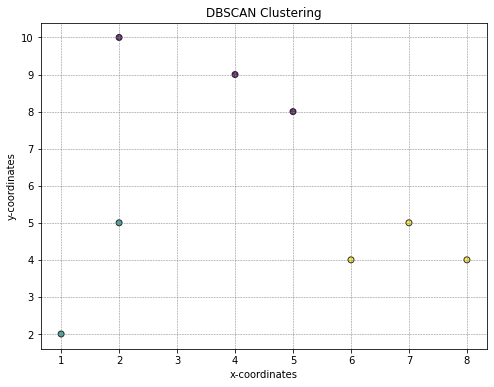

In [77]:
#Part C
import numpy as np
import matplotlib.pyplot as plt
import math

def DBScan(X, eps, MinPts):
    labels = np.zeros(X.shape[0])
    C = 0

    for i in range(X.shape[0]):
        if not (labels[i] == 0):
            continue

        neighbors = []
        for j in range(X.shape[0]):
            if euclidean(X[i], X[j]) <= eps:
                neighbors.append(j)

        if len(neighbors) < MinPts:
            labels[i] = -1
            continue

        C += 1
        labels[i] = C

        for j in neighbors:
            if labels[j] == -1:
                labels[j] = C
            if labels[j] == 0:
                labels[j] = C
                neighbors2 = []
                for k in range(X.shape[0]):
                    if euclidean(X[j], X[k]) <= eps:
                        neighbors2.append(k)

                if len(neighbors2) >= MinPts:
                    neighbors += neighbors2

    noise_points = X[labels == -1]
    core_points = X[labels > 0]

    
    plt.figure(figsize=(8, 6))
    plt.scatter(core_points[:,0], core_points[:,1], c=labels[labels > 0], cmap='viridis', edgecolor='k', alpha=0.8)
    plt.scatter(noise_points[:,0], noise_points[:,1], c='gray', marker='x', alpha=0.5)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.title('DBSCAN Clustering')
    plt.xlabel("x-coordinates")
    plt.ylabel("y-coordinates")
    plt.show()


X = np.array([[2,10], [2,5], [8,4], [5,8], [7,5], [6,4], [1,2], [4,9]])

print("Q13:")
DBScan(X, 2, 2)


print("Q14:")
DBScan(X, math.sqrt(10), 2)

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import math

def DBScan(X, eps, MinPts):
    labels = np.zeros(X.shape[0])
    C = 0

    for i in range(X.shape[0]):
        if not (labels[i] == 0):
            continue

        neighbors = []
        for j in range(X.shape[0]):
            if euclidean(X[i], X[j]) <= eps:
                neighbors.append(j)

        if len(neighbors) < MinPts:
            labels[i] = -1
            continue

        C += 1
        labels[i] = C

        for j in neighbors:
            if labels[j] == -1:
                labels[j] = C
            if labels[j] == 0:
                labels[j] = C
                neighbors2 = []
                for k in range(X.shape[0]):
                    if euclidean(X[j], X[k]) <= eps:
                        neighbors2.append(k)

                if len(neighbors2) >= MinPts:
                    neighbors += neighbors2

    noise_points = X[labels == -1]
    core_points = X[labels > 0]

def standardScaler(X):
    X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
    return X_norm

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def pairwise_distances(X, Y=None):
    if Y is None:
        Y = X
    dists = np.sqrt(np.sum((X[:, np.newaxis, :] - Y[np.newaxis, :, :]) ** 2, axis=2))

    return dists

data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

X = data[['sbp', 'tobacco']].values
y = data['chd'].values

X_train = X[:300]
y_train = y[:300]
X_test = X[300:]
y_test = y[300:]

X_train_norm = standardScaler(X_train)
X_test_norm = standardScaler(X_test)

DBScan(X_train_norm, 2, 10)

y_pred = []
for i in range(X_test_norm.shape[0]):
    distances = [pairwise_distances(X_test_norm[i].reshape(1, -1), r.reshape(1, -1))[0][0] for r in X_train_norm]
    nearest_index = np.argmin(distances)
    y_pred.append(y_train[nearest_index])

y_pred = np.array(y_pred)

accuracyDBScan_2 = accuracy(y_test, y_pred)*100

print("\nAssumptions: I assume the data is accurate and has no missing values and the dataset is an accurate sample of the total population")

print("Q15:")
print(f"KMeans Accuracy: {accuracyKM_2:.2f}%")
print("KNN Accuracy: {:.2f}%".format(accuracyKNN_2 * 100))
print('DBScan Accuracy: {:.2f}%'.format(accuracyDBScan_2))

print("\nComparing results between Dataset 1 and 2:")
print("The results show that the self-programmed algorithms tend to work better on smaller datasets (dataset 1) compared to larger ones (dataset 2) but work somewhat well given minimal training")


Assumptions: I assume the data is accurate and has no missing values and the dataset is an accurate sample of the total population
Q15:
KMeans Accuracy: 67.28%
KNN Accuracy: 56.17%
DBScan Accuracy: 62.35%

Comparing results between Dataset 1 and 2:
The results show that the self-programmed algorithms tend to work better on smaller datasets (dataset 1) compared to larger ones (dataset 2) but work somewhat well given minimal training


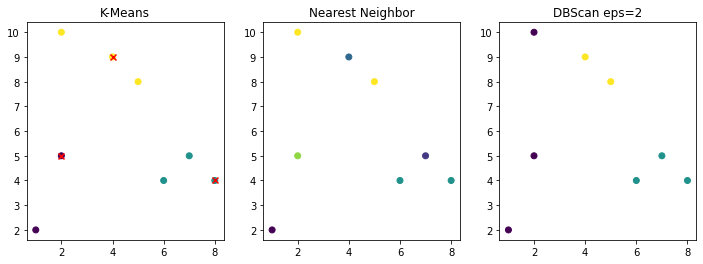

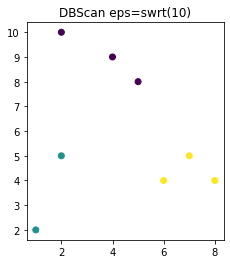

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
centers = np.array([X[1], X[2], X[7]])

kmeans = KMeans(n_clusters=3, init=centers, n_init=1).fit(X)
kmeans_labels = kmeans.labels_

nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X)
nn_distances, nn_indices = nbrs.kneighbors(X)
nn_labels = np.array([nn_indices[i, 1] for i in range(len(X))])

dbscan = DBSCAN(eps=2, min_samples=2).fit(X)
dbscan_labels = dbscan.labels_

dbscan2 = DBSCAN(eps=math.sqrt(10), min_samples=2).fit(X)
dbscan2_labels = dbscan2.labels_

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.scatter(centers[:, 0], centers[:, 1], c='r', marker='x')
plt.title('K-Means')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=nn_labels)
plt.title('Nearest Neighbor')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBScan eps=2')


plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=dbscan2_labels)
plt.title('DBScan eps=swrt(10)')

plt.show()

In [80]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df = pd.read_csv(url)

X = df[['tobacco', 'sbp']].values
y = df['chd'].values

X_train = X[:300]
y_train = y[:300]
X_test = X[300:]
y_test = y[300:]

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

kmeans = KMeans(n_clusters=2, init='random', n_init=10, random_state=0)
kmeans.fit(X_train_norm)
y_pred = kmeans.predict(X_test_norm)
acc_kmeans = accuracy_score(y_test, y_pred)

nn = KNeighborsClassifier(n_neighbors=3)
nn.fit(X_train_norm, y_train)
y_pred = nn.predict(X_test_norm)
acc_nn = accuracy_score(y_test, y_pred)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train_norm)
y_pred = dbscan.fit_predict(X_test_norm)
acc_dbscan = accuracy_score(y_test, y_pred)

print('K-Means Accuracy: {:.2f}%'.format(acc_kmeans * 100))
print('Nearest Neighbor Accuracy: {:.2f}%'.format(acc_nn * 100))
print('DBScan Accuracy: {:.2f}%'.format(acc_dbscan * 100))

K-Means Accuracy: 70.37%
Nearest Neighbor Accuracy: 64.20%
DBScan Accuracy: 66.67%


Dataset 1:
The results were very similar for KMeans however the centroids were slightly off compared to my algorithm, in KNN the points seem to be misrepresented by using a variety of colors but seem to be in the same clusters, and laslty for DBScan the results were exactly the same as my DBScan alogirthm.


Dataset 2:
The accuracy for dataset 2 using sklearn was slightly better than the self-designed Kmeans, KNN, and DBScan alogirthms by roughly 3%, 9%, and 4%, but otherwise, was the same.



1) What are the different metrics used to evaluate the performance of different clustering algorithms?
The ways to test the different clustering algorithms are using precision, recall, accuracy, and f1.

2) Instead of accuracy, what other ways can we evaluate the performance of the three algorithms in lab 3?
Other methods discussed in lectures include the elbow method and visual inspection and the other three mentioned above: precision, recall, and f1.